<a href="https://colab.research.google.com/github/ProfAI/machine-learning-modelli-e-algoritmi/blob/main/3%20-%20Naive%20Bayes/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gli algoritmi Naive Bayes

In [ ]:
from sklearn.datasets import load_iris, make_gaussian_quantiles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-modelli-e-algoritmi/main/datasets/"
RANDOM_SEED = 0

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

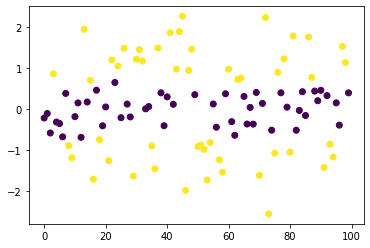

In [ ]:
X, y = make_gaussian_quantiles(n_features=1, n_classes=2, random_state=RANDOM_SEED)
plt.scatter(np.arange(X.shape[0]),X, c=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.36666666666666664

In [ ]:
y_proba = lr.predict_proba(X_test)
log_loss(y_test, y_proba)

0.7342855504709547

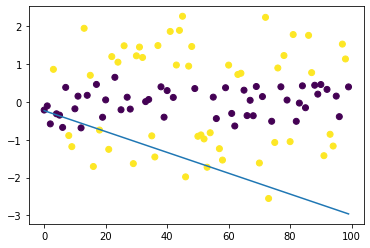

In [ ]:
a = np.arange(X.shape[0])
plt.scatter(a, X, c=y)
plt.plot(a, a*lr.coef_[0]+lr.intercept_)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9333333333333333

In [ ]:
y_proba = gnb.predict_proba(X_test)
log_loss(y_test, y_proba)

0.18879658207548125

## Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [ ]:
df = pd.read_csv(BASE_URL+"spam_balanced.csv")
df.head()

,SPAM,MESSAGE
0,0,Horrible bf... I now v hungry...
1,0,Dad says hurry the hell up
2,0,I sent lanre fakeye's Eckankar details to the ...
3,0,Can you tell Shola to please go to college of ...
4,0,I love to wine and dine my lady!


In [ ]:
sms_list = df["MESSAGE"].tolist()
sms_list[0]

'Horrible bf... I now v hungry...'

In [ ]:
"""
def build_vocab(corpus):
  vocab = []
  for text in corpus:
    for word in text.split():
      if word not in vocab:
        vocab.append(word.lower())
  return vocab
"""

def build_vocab(corpus):
  vocab = set({})
  for text in corpus:
    vocab = vocab.union(set(text.lower().split()))
  return list(vocab)


vocab = build_vocab(sms_list)
vocab[:10]

['comp',
 'santa',
 'age23,',
 'wish',
 'i',
 'sweetheart',
 'largest',
 '08714342399.2stop',
 '07090298926',
 '83383']

In [ ]:
def binary_bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = int(vocab[i] in sms)
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bbow = binary_bow(sms_list, vocab=vocab)
sms_bbow[0]

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
def binary_bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = int(vocab[i] in sms)
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bbow = binary_bow(sms_list, vocab=vocab)

In [ ]:
X = sms_bbow
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       155
           1       0.92      0.99      0.96       145

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       154
           1       0.92      0.99      0.95       146

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv(BASE_URL+"spam_balanced.csv")
df.head()

,SPAM,MESSAGE
0,0,Horrible bf... I now v hungry...
1,0,Dad says hurry the hell up
2,0,I sent lanre fakeye's Eckankar details to the ...
3,0,Can you tell Shola to please go to college of ...
4,0,I love to wine and dine my lady!


In [ ]:
def bow(corpus, vocab=None):

  if vocab is None:
    vocab = build_vocab(corpus)

  vocab_size = len(vocab)
  sms_occurrences = []

  for sms in sms_list:
    sms_occurrence = [0]*vocab_size
    for i in range(vocab_size):
        sms_occurrence[i] = sms.count(vocab[i])
    sms_occurrences.append(sms_occurrence)

  return sms_occurrences

sms_bow = bow(sms_list, vocab)

In [ ]:
np.array(sms_bow).max()

74

In [ ]:
X = sms_bow
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       156
           1       0.91      0.99      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       155
           1       0.92      0.99      0.96       145

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
mnb.class_count_

array([356., 344.])

### Con TF-IDF

**ATTENZIONE** Il vocabolario va costruito sui dati di training, altrimenti è data leakage!

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df["MESSAGE"]
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(700, 1000)

In [ ]:
benb = BernoulliNB()
benb.fit(X_train, y_train)
report = classification_report(benb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       174
           1       0.81      1.00      0.89       126

    accuracy                           0.90       300
   macro avg       0.90      0.91      0.90       300
weighted avg       0.92      0.90      0.90       300



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       142
           1       0.94      0.92      0.93       158

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



##Complement Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
df = pd.read_csv(BASE_URL+"spam.csv")
df.head()

,SPAM,MESSAGE
0,0,Good afternoon my boytoy. How goes that walkin...
1,0,Painful words- \I thought being Happy was the ...
2,0,Do you know why god created gap between your f...
3,1,Todays Voda numbers ending 7548 are selected t...
4,0,Hope this text meets you smiling. If not then ...


In [ ]:
df["SPAM"].value_counts()

0    866
1    134
Name: SPAM, dtype: int64

In [ ]:
X = df["MESSAGE"]
y = df["SPAM"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
tfidf = TfidfVectorizer(stop_words="english", max_features=1000)
X_train = tfidf.fit_transform(X_train.tolist())
X_test = tfidf.transform(X_test)
X_train.shape

(700, 1000)

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
report = classification_report(mnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       273
           1       0.69      1.00      0.82        27

    accuracy                           0.96       300
   macro avg       0.85      0.98      0.90       300
weighted avg       0.97      0.96      0.96       300



In [ ]:
confusion_matrix(y_test, mnb.predict(X_test))

array([[261,   0],
       [ 12,  27]])

In [ ]:
comnb = ComplementNB()
comnb.fit(X_train, y_train)
report = classification_report(comnb.predict(X_test), y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       246
           1       0.92      0.67      0.77        54

    accuracy                           0.93       300
   macro avg       0.93      0.83      0.87       300
weighted avg       0.93      0.93      0.93       300



In [ ]:
confusion_matrix(y_test, comnb.predict(X_test))

array([[243,  18],
       [  3,  36]])

## Categorical Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/boston.csv",
                 usecols=["ZN", "CHAS", "RAD", "RM", "PRICE",])
df.head()

,ZN,CHAS,RM,RAD,PRICE
0,18.0,0.0,6.575,1.0,24.0
1,0.0,0.0,6.421,2.0,21.6
2,0.0,0.0,7.185,2.0,34.7
3,0.0,0.0,6.998,3.0,33.4
4,0.0,0.0,7.147,3.0,36.2


In [ ]:
df["RM"] = df["RM"].apply(lambda x: int(x))
df.nunique()

ZN        26
CHAS       2
RM         6
RAD        9
PRICE    229
dtype: int64

In [ ]:
def price_to_category(price):

  categories = ["VERY CHEAP", "CHEAP", "AVERAGE", "EXPENSIVE", "VERY EXPESIVE"]

  for i in range(1,5):
    if price<df["PRICE"].quantile(0.2*i):
      return categories[i]
  
  return categories[-1]


df["PRICE"] = df["PRICE"].apply(price_to_category)

In [ ]:
X = df.drop("PRICE", axis=1).values
y = df["PRICE"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [ ]:
lr = GaussianNB()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.3881578947368421

In [ ]:
catnb = CategoricalNB()
catnb.fit(X_train, y_train)
catnb.score(X_test, y_test)

0.5657894736842105